# Sprint ゲート付きリカレントニューラルネットワーク
Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。<br>
<br>
以下のドキュメントにまとめられています。<br>
<br>
[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)

## 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。<br>
<br>
Keras公式のサンプルコードを利用してください。<br>
<br>
#### LSTMのサンプルコード<br>

[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)

#### ConvLSTM2Dのサンプルコード

[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)<br>
<br>
このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

### データセット準備：ロイターニュース

### Simple RNN

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN, GRU, LSTM
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras import backend as K

Using TensorFlow backend.


In [ ]:
from keras.datasets import imdb
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
maxlen = 80
batch_size = 32

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 115s 5ms/step - loss: 0.6840 - accuracy: 0.5472 - val_loss: 0.6616 - val_accuracy: 0.5848
Epoch 2/3
25000/25000 [==============================] - 113s 5ms/step - loss: 0.6147 - accuracy: 0.6518 - val_loss: 0.6328 - val_accuracy: 0.6285
Epoch 3/3
25000/25000 [==============================] - 8s 314us/step
Test score: 0.5940583119392395
Test accuracy: 0.6904399991035461


### GRU

In [ ]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 233s 9ms/step - loss: 10.2119 - accuracy: 0.7099 - val_loss: 0.5782 - val_accuracy: 0.6872
Epoch 2/3
25000/25000 [==============================] - 232s 9ms/step - loss: 4.2305 - accuracy: 0.7606 - val_loss: 0.6036 - val_accuracy: 0.6609
Epoch 3/3
25000/25000 [==============================] - 17s 673us/step
Test score: 0.599468705997467
Test accuracy: 0.6731600165367126


### LSTM

In [ ]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 217s 9ms/step - loss: 0.4569 - accuracy: 0.7860 - val_loss: 0.3773 - val_accuracy: 0.8363
Epoch 2/3
25000/25000 [==============================] - 213s 9ms/step - loss: 0.2923 - accuracy: 0.8828 - val_loss: 0.4040 - val_accuracy: 0.8330
Epoch 3/3
25000/25000 [==============================] - 14s 567us/step
Test score: 0.4092349849891663
Test accuracy: 0.8310400247573853


>上記三つのモデルの精度を比較した結果は以下の通り。<br>
>GRU < SimpleRNN << LSTM<br>
>SimpleRNNとGRUは似た精度に対し、LSTMは最も高い精度を示した。やはりゲート機構を備えた方が学習精度を高めることが見受けられる。GRUもLSTM同様ゲート機構を搭載しており、調査によると同等の精度を示すとあったが、データセットに左右されるため、実際に検証する必要があると思われる。

### ConvLSTM2D

In [ ]:
K.clear_session()

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 40, 40, 40)  59200     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 40, 40, 40)  115360    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 40, 40, 40)  160       
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, None, 40, 40, 40) 

Train on 950 samples, validate on 50 samples
Epoch 1/3
950/950 [==============================] - 120s 126ms/step - loss: 0.2523 - val_loss: 0.3894
Epoch 2/3
950/950 [==============================] - 114s 120ms/step - loss: 0.0194 - val_loss: 0.3254
Epoch 3/3
950/950 [==============================] - 114s 120ms/step - loss: 0.0076 - val_loss: 0.2439


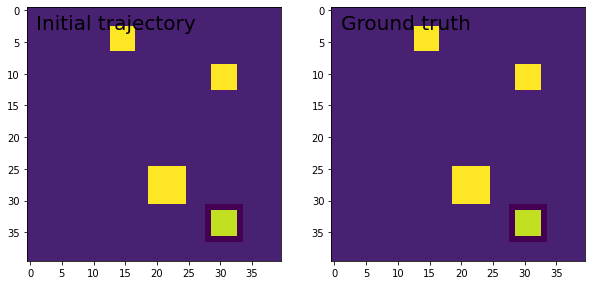

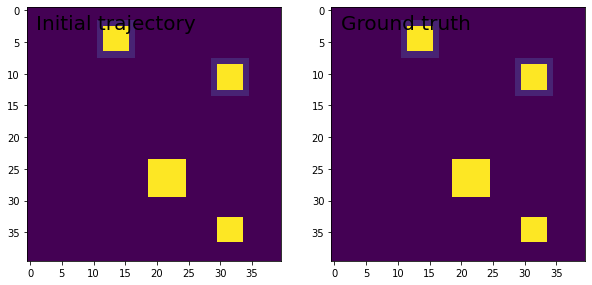

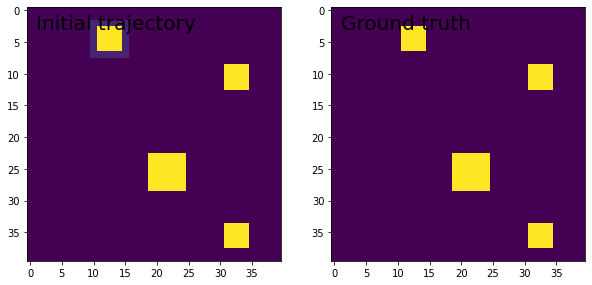

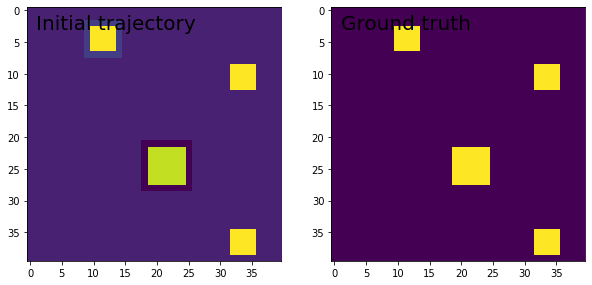

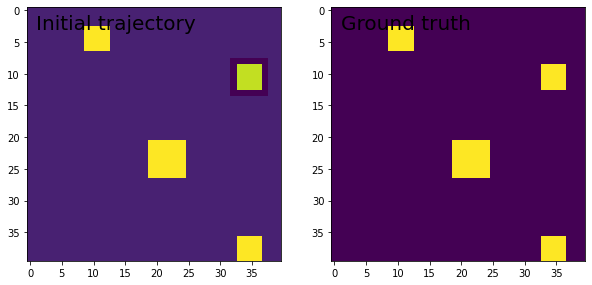

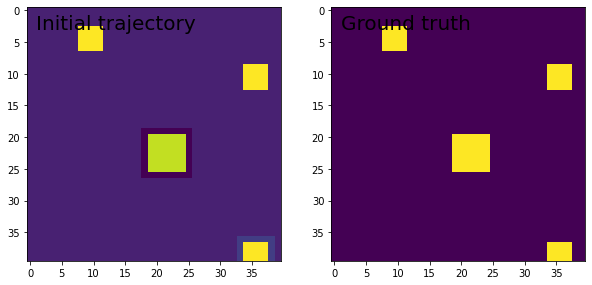

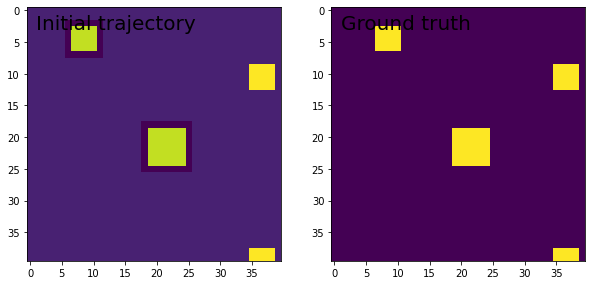

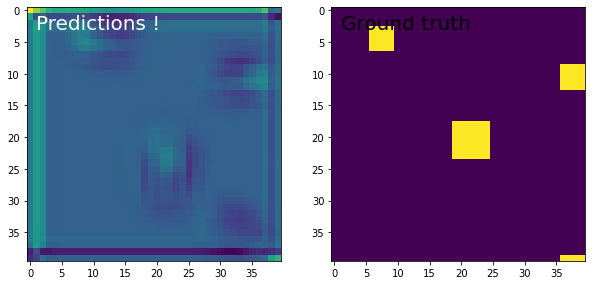

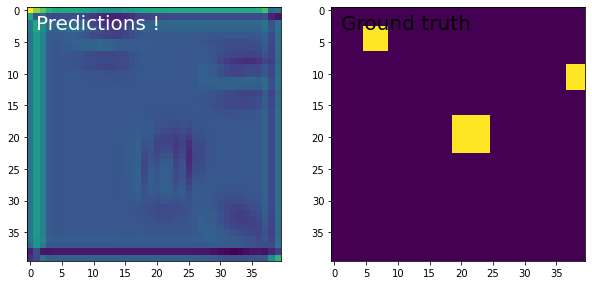

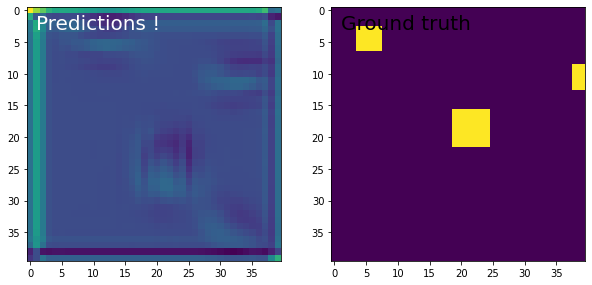

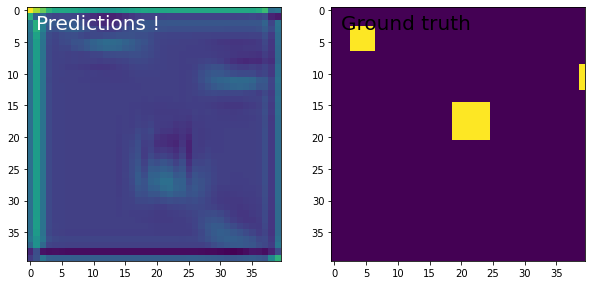

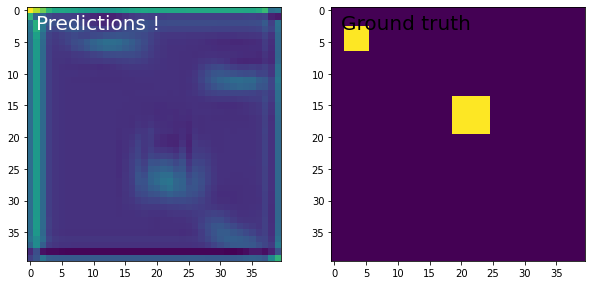

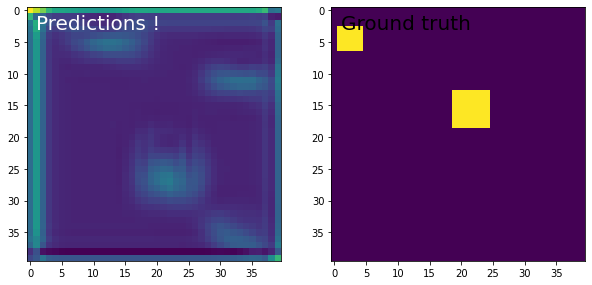

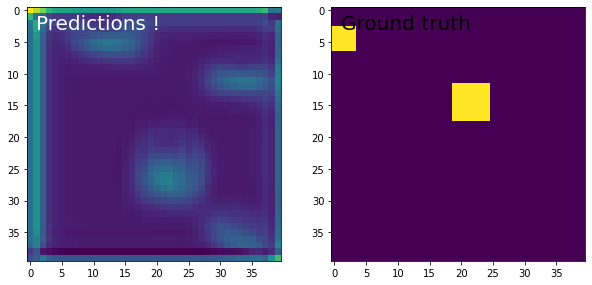

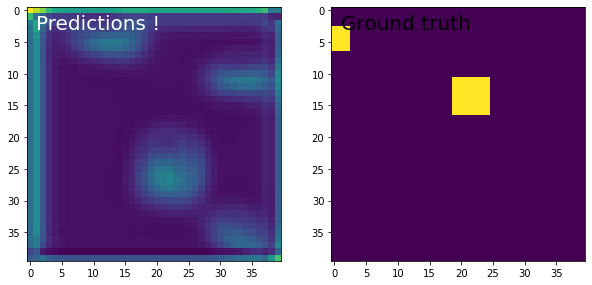

In [ ]:
seq.compile(loss='binary_crossentropy', optimizer='adadelta')
# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=3, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

In [ ]:
score, acc = seq.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

## 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。<br>
<br>
[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)<br>
<br>
Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

>ロイターデータセットに対してSimpleRNN, GRU, LSTMを学習させ、精度の違いを検証する。<br>
>また、パラメータ調整の影響もLSTMを用いて調査する。

In [2]:
from keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [11]:
len(reuters.get_word_index())

557056/550378 [==============================] - 1s 2us/step


30979

In [ ]:
# カテゴリ数を確認
np.unique(y_train) # 46 categories

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [3]:
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y_train = enc.fit_transform(y_train[:,None])
y_test = enc.fit_transform(y_test[:,None])

### SimpleRNN

In [ ]:
max_features = 20000
maxlen = 80
batch_size = 32

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

In [5]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))
model.summary()

Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 2,598,830
Trainable params: 2,598,830
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/3
8982/8982 [==============================] - 40s 4ms/step - loss: 2.5949 - accuracy: 0.3169 - val_loss: 2.4141 - val_accuracy: 0.4074
Epoch 2/3
8982/8982 [==============================] - 41s 5ms/step - loss: 2.3037 - accuracy: 0.3877 - val_loss: 2.2367 - val_accuracy: 0.4221
Epoch 3/3
2246/2246 [==============================] - 1s 482us/step
Test score: 2.1870873152732
Test accuracy: 0.4278717637062073


### GRU

In [ ]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 2,664,622
Trainable params: 2,664,622
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/3
8982/8982 [==============================] - 90s 10ms/step - loss: 2.6991 - accuracy: 0.3633 - val_loss: 2.2763 - val_accuracy: 0.3669
Epoch 2/3
8982/8982 [==============================] - 89s 10ms/step - loss: 2.5372 - accuracy: 0.4061 - val_loss: 2.1841 - val_accuracy: 0.4163
Epoch 3/3
2246/2246 [==============================] - 2s 1ms/step
Test score: 2.1787321106833426
Test accuracy: 0.4243098795413971


### LSTM
ベースライン（maxlen=80, max_features=200, nodes=128, epoch=3）に対して、下記パラメータの影響を検証する
- maxlen (文章の長さ)　→200
- max_features (単語数)　→最大数(30979)
- ノード数を増やす　→1000
- エポック数を増やす　→10

In [ ]:
# ベースライン
max_features = 20000
maxlen = 80
batch_size = 32

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

In [ ]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 2,697,518
Trainable params: 2,697,518
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/3
8982/8982 [==============================] - 74s 8ms/step - loss: 2.2822 - accuracy: 0.4263 - val_loss: 2.0245 - val_accuracy: 0.5071
Epoch 2/3
8982/8982 [==============================] - 74s 8ms/step - loss: 1.7819 - accuracy: 0.5450 - val_loss: 1.7151 - val_accuracy: 0.5806
Epoch 3/3
2246/2246 [==============================] - 2s 882us/step
Test score: 1.5631925371854516
Test accuracy: 0.5948352813720703


In [7]:
# maxlen（文章の長さ）を増やす
max_features = 20000
maxlen = 200
batch_size = 32

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (8982, 200)
x_test shape: (2246, 200)


In [9]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/3
8982/8982 [==============================] - 179s 20ms/step - loss: 2.1833 - accuracy: 0.4331 - val_loss: 1.7716 - val_accuracy: 0.5396
Epoch 2/3
8982/8982 [==============================] - 179s 20ms/step - loss: 1.7213 - accuracy: 0.5461 - val_loss: 1.6932 - val_accuracy: 0.5677
Epoch 3/3
2246/2246 [==============================] - 4s 2ms/step
Test score: 1.570690053016717
Test accuracy: 0.6113089919090271


In [15]:
# max_features（単語数）を増やす
max_features = len(reuters.get_word_index()) # 30979
maxlen = 80
batch_size = 32

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)


In [16]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         3965312   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 4,102,830
Trainable params: 4,102,830
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/3
8982/8982 [==============================] - 79s 9ms/step - loss: 2.2106 - accuracy: 0.4371 - val_loss: 1.9805 - val_accuracy: 0.5142
Epoch 2/3
8982/8982 [==============================] - 77s 9ms/step - loss: 1.7182 - accuracy: 0.5540 - val_loss: 1.7162 - val_accuracy: 0.5561
Epoch 3/3
2246/2246 [==============================] - 2s 873us/step
Test score: 1.6529883637772218
Test accuracy: 0.574799656867981


In [4]:
# ノードを増やす
max_features = 20000
maxlen = 80
batch_size = 32

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)


In [5]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 1000))
model.add(LSTM(1000, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 1000)        20000000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense_1 (Dense)              (None, 46)                46046     
Total params: 28,050,046
Trainable params: 28,050,046
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/3
8982/8982 [==============================] - 128s 14ms/step - loss: 2.1147 - accuracy: 0.4538 - val_loss: 2.0622 - val_accuracy: 0.4702
Epoch 2/3
8982/8982 [==============================] - 128s 14ms/step - loss: 1.7149 - accuracy: 0.5623 - val_loss: 1.6647 - val_accuracy: 0.5641
Epoch 3/3
2246/2246 [==============================] - 6s 2ms/step
Test score: 1.4745570792752722
Test accuracy: 0.6406945586204529


In [5]:
# epochを増やす
max_features = 20000
maxlen = 80
batch_size = 32

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)


In [6]:
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 2,697,518
Trainable params: 2,697,518
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 73s 8ms/step - loss: 2.2470 - accuracy: 0.4372 - val_loss: 1.8236 - val_accuracy: 0.5378
Epoch 2/10
8982/8982 [==============================] - 73s 8ms/step - loss: 1.7364 - accuracy: 0.5519 - val_loss: 1.7255 - val_accuracy: 0.5628
Epoch 3/10
8982/8982 [==============================] - 73s 8ms/step - loss: 1.5478 - accuracy: 0.5999 - val_loss: 1.6033 - val_accuracy: 0.6037
Epoch 4/10
8982/8982 [==============================] - 73s 8ms/step - loss: 1.3162 - accuracy: 0.6620 - val_loss: 1.4813 - val_accuracy: 0.6300
Epoch 5/10
8982/8982 [==============================] - 74s 8ms/step - loss: 1.0811 - accuracy: 0.7279 - val_loss: 1.4111 - val_accuracy: 0.6581
Epoch 6/10
8982/8982 [==============================] - 74s 8ms/step - loss: 0.9028 - accuracy: 0.7704 - val_loss: 1.3906 - val_accuracy: 0.6754
Epoch 7/10
8982/8982 [==============================] - 75s 8ms/step - loss: 0.742

>4つのパラメータを調整した結果、Test accuracyに寄与した順に、①エポック、②ノード数、③maxlen、④max_featuresとなった。エポック数に関しては、過学習が顕著である。Early Stoppingを導入し、他のパラメータと組み合わせて精度を上げるべきと思われる。

## 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

- RNN
> 基底となるRNNのKeras API。SimpleRNNとは違い、引数で各Cell内の処理を定義する必要がある。セル処理をカスタマイズすることができるのが利点。SimpleRNNCellをCallするとSimpleRNNと同じ挙動になる。
- SimpleRNNCell
> SimpleRNNの単Cellが実行する基本的な再帰処理。
> $$
a_t = x_{t}\cdot W_{x} + h_{t-1}\cdot W_{h} + B
$$
- GRUCell
> ゲート付きRNNの処理セル。更新ゲートとリセットゲートを実装しており、過去のセルからの情報を取捨選択できる機構を備えている。LSTMと似ているが、GRUは高速性を得た代わりに、表現力は劣る。<br>
https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be
- LSTMCell
> GRUの変化形で、ゲートをひとつ増やしたRNN。入力、出力、忘却の３種流のゲートを実装している。入力と忘却はGRUの更新とリセットの機能に類似しており、出力ゲートは次の状態へ渡す情報量の調整を可能としている。
- StackedRNNCells
> RNNセルに深さを与える機能。再帰ネットワークにDNNのように深さを付与することによって、入力の特徴量をより抽象的に捉えることが可能となる。このモジュールでは一つのセル内で複数のRNNCellを実装することができる。RNNの回路そのものを複数スタックすることも可能<br>
https://machinelearningmastery.com/stacked-long-short-term-memory-networks/
- CuDNNGRU
> GRUセルをGPU上で計算する
- CuDNNLSTM
> LSTMセルをGPU上で計算する